In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, datasets
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [123]:
X, y = datasets.make_gaussian_quantiles(n_samples=500,n_classes=2,random_state=4)

df = pd.DataFrame(X,columns=['x1','x2'])
df['class'] = y

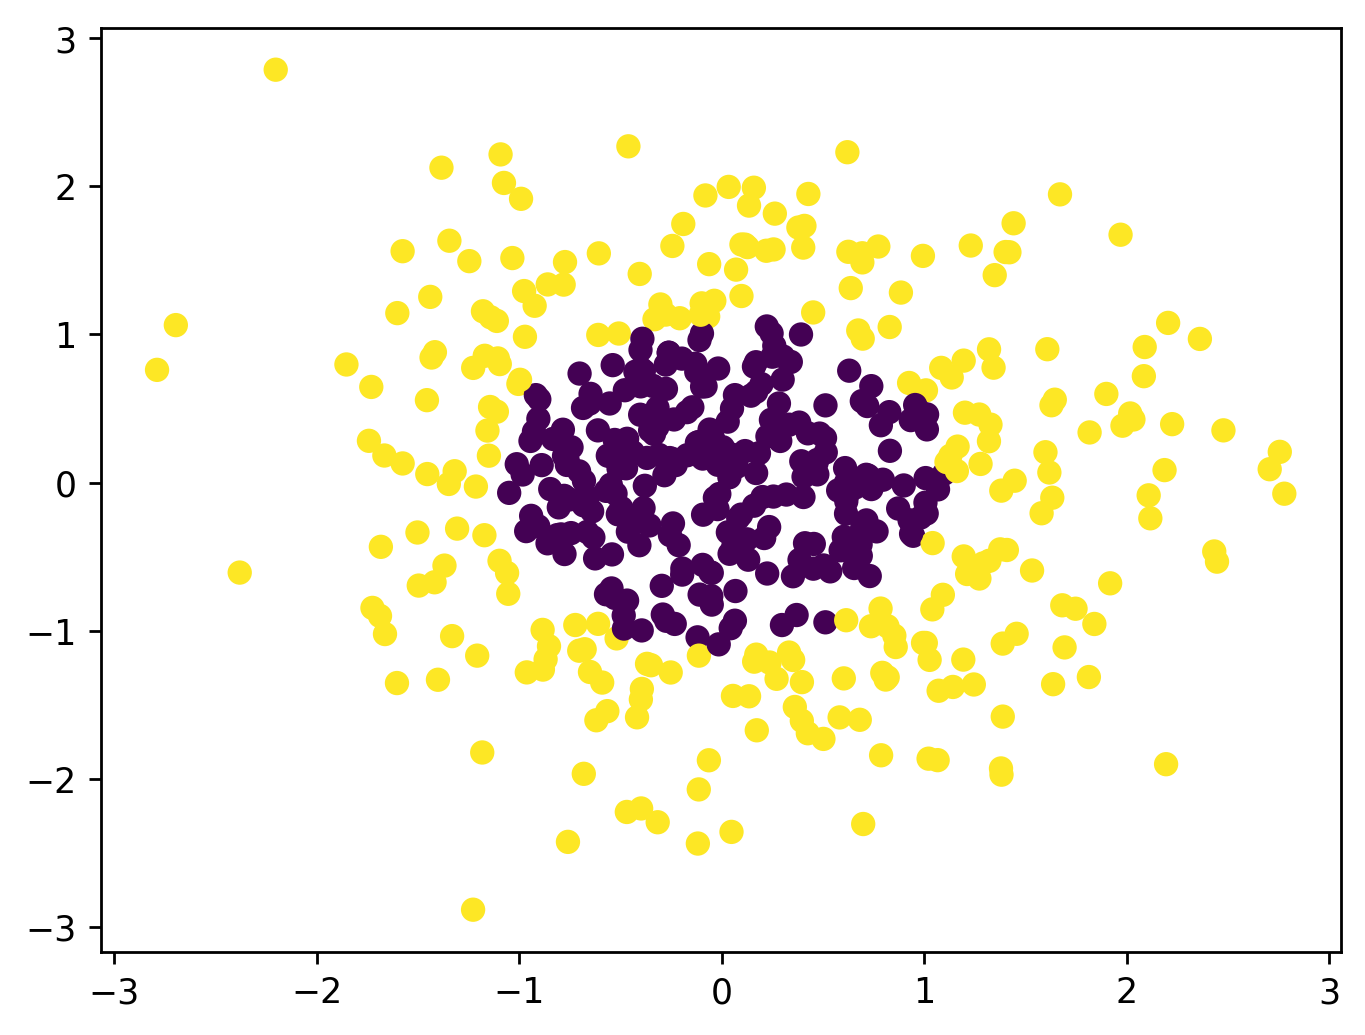

In [124]:
plt.figure(dpi=250)
plt.scatter('x1','x2',c='class',data=df)

In [125]:
#Decision Tree 생성
clf = tree.DecisionTreeClassifier()

#train, test split
X_train, X_test = train_test_split(df)

y_train = X_train.pop(X_train.columns[-1])
y_test = X_test.pop(X_test.columns[-1])

clf.fit(X_train,y_train)
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.928

In [142]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/var/folders/wb/hsgyhgm57kbgysv0zmm8fjgc0000gn/T/ipykernel_64845/1380751698.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


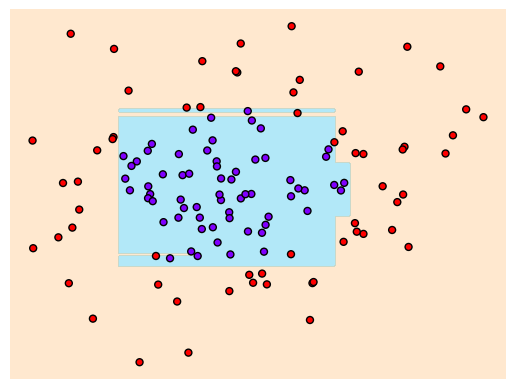

In [141]:
visualize_boundary(clf,np.array(X_test),np.array(y_test))   

In [143]:
accuracy_score(y_test,pred)

0.928

In [67]:
#Breast cancer Wisconsin diagnostic dataset
load_df = datasets.load_breast_cancer()

data = pd.DataFrame(load_df.data)
feature = pd.DataFrame(load_df.feature_names)
data.columns = feature[0]
target=pd.DataFrame(load_df.target)
target.columns=['target']
df = pd.concat([data,target],axis=1)

In [25]:
def bootstrap(X):
    Y = resample(X,replace=True,n_samples=len(X))
    return Y

In [106]:
def rf(df,T):
    #train, test split
    df_train,df_test = train_test_split(df)

    X_test = df_test
    y_test = X_test.pop(X_test.columns[-1])


    vote = np.zeros(shape=(T,len(y_test)))
    acc = []


    for i in range(T):
        #bootstrap
        X_train = bootstrap(df_train)
        y_train = X_train.pop(X_train.columns[-1])

        #Decision tree 생성 (최대 sqrt(N)개의 feature 사용)
        globals()["tree{}".format(i)] = tree.DecisionTreeClassifier(max_features='sqrt')
        globals()["tree{}".format(i)].fit(X_train,y_train)

        pred = globals()["tree{}".format(i)].predict(X_test)
        vote[i,:] = pred
        acc.append(accuracy_score(y_test,pred))

    #Majority voting
    maj = []
    for i in range(len(y_test)):
        if vote[:,i].sum() >= T/2:
           maj.append(1)
        else :
            maj.append(0)

    print(accuracy_score(y_test,maj))
    print(np.mean(acc))
    print(np.std(acc))


In [117]:
rf(df,150)

0.965034965034965
0.9114219114219114
0.022241231593243014


In [35]:
clf = tree.DecisionTreeRegressor(max_depth=1)
